<a href="https://colab.research.google.com/github/iaasmiin/Python_Intro/blob/main/Primeiro_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1

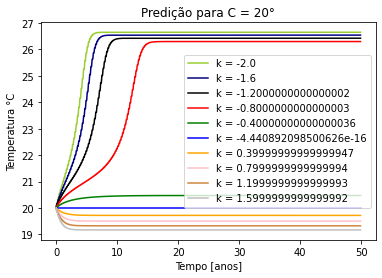

In [81]:
import math
import numpy as np
import matplotlib.pyplot as plt


def func(t , c , k):
  return ((1/10)*((c-20)*(22-c)*(c-26))) - k 

def Euler(fun,t, y0, k):
  y=[]
  y.append(y0)      
  dt = t[1]-t[0]
  for i in range(len(t)-1): 
    yi = y[i-1]  + fun(t[i-1],y[i-1],k) * dt
    y.append(yi)
  return t, y

step=0.1
t = np.arange(0,50,step)
k =  np.arange(-2,2,0.4)
color  = ['yellowgreen','navy','black','red','green','blue','orange','pink','peru','silver','purple','violet']


plt.title('Predição para C = 20°')

for pos, i in enumerate(k):
  x,y = Euler(func, t, y0=20,k = i)
  plt.plot(x,y,color=color[pos],label= f'k = {i}')

plt.legend()
plt.xlabel('Tempo [anos]')
plt.ylabel('Temperatura °C')
plt.show()





# Etapa 2

**Código modificado para ser um módulo**

In [3]:

import math
import numpy as np
import matplotlib.pyplot as plt


def func(t , c , k):
  return ((1/10)*((c-20)*(22-c)*(c-26))) - k 
  

def Euler(fun,t, y0, k):
  y=[]
  y.append(y0)      
  dt = t[1]-t[0]
  for i in range(len(t)-1): 
    yi = y[i-1]  + fun(t[i-1],y[i-1],k) * dt
    y.append(yi)
  return t, y


def solution(k_list,c):
  t = np.arange(0,50,0.1)
  k =  np.arange(k_list[0],k_list[1],0.4)
  x_solution = []
  y_solution = []

  for i in k:
    x,y = Euler(func, t, y0=c,k = i)
    x_solution.append(x)
    y_solution.append(y)
  
  return x_solution,y_solution,k

def solution_C(c_list,k_list):
    x_solut = []
    y_solut = []
    k_solut = []
    c = np.arange(c_list[0],c_list[1],1)

    for valor in c:
      x,y,k = solution(k_list,valor)
      x_solut.append(x)
      y_solut.append(y)
      k_solut.append(k)
    return x_solut,y_solut,k_solut 

def equilibrio(x,y,k):  
      for c in y:
        if round(c,2) == round(y[-1],2): 
            pos_eq = y.index(c)
            k_eq = k
            C_eq = round(c,2)
            tempo_eq = x[pos_eq]
            break 
      return k_eq,C_eq,tempo_eq





**Para chamar o módulo**

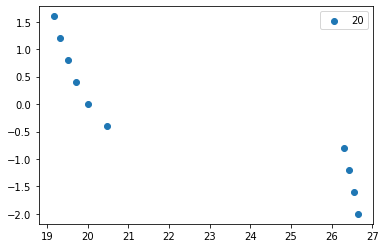

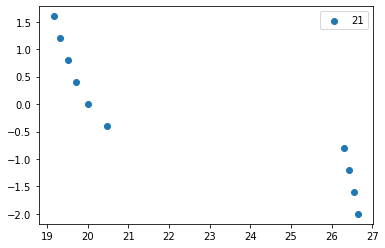

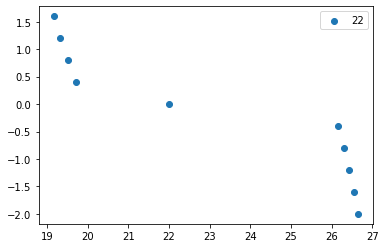

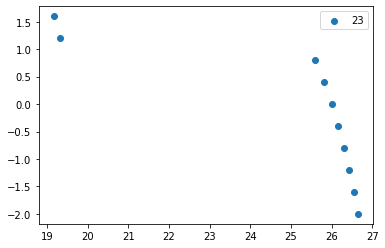

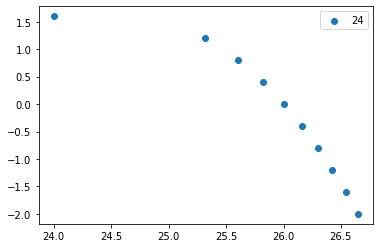

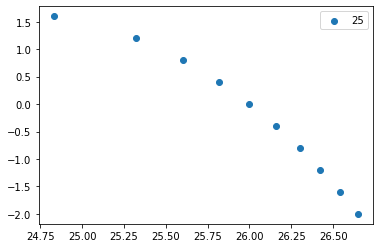

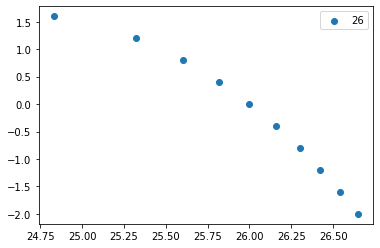

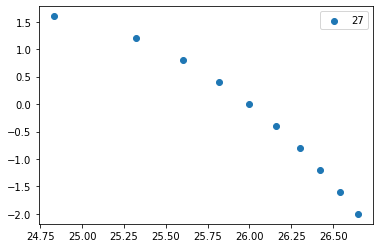

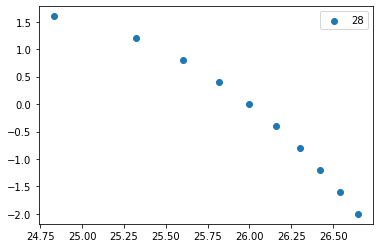

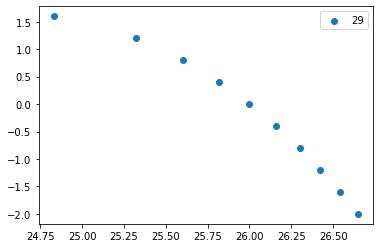

In [4]:
#Podemos chamar a função solution do módulo acima para calcular os intervalos de K e C

x,y,k = solution_C([20,30],[-2,2])

for t in range(len(x)):  
  lista_eq_temp = []
  lista_eq_K = []
  for c in range(len(k[t])):  
      K,C,tempo = equilibrio(x[t][c],y[t][c],k[t])
      lista_eq_temp.append(C)
      lista_eq_K.append(K)
  plt.scatter(lista_eq_temp,lista_eq_K[0],label = f'{y[t][0][0]}')
  plt.legend()
  plt.show()